In [49]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [79]:
data = pd.read_excel(f'C:\\Users\\Leonardo\\Desktop\\Projetos Python\\Pesquisa\\trelica2D-final\\output.xlsx')


In [80]:
data = data.drop('Unnamed: 0', axis = 1)

In [81]:
data

,Section G0,Material G0,Fx,Fy,desloc_x,desloc_y,Tension G0,sigma/sigma_adm G0
0,0.000235,200000000000,134227,-969227,-0.044982,-0.198496,6.358790e+09,18.447315
1,0.000471,200000000000,769976,447792,0.027013,0.067327,2.817105e+09,8.172629
2,0.000349,200000000000,689986,-878056,-0.012094,-0.101198,3.690815e+09,10.707326
3,0.000379,200000000000,-182321,145156,0.000144,0.013206,5.416401e+08,1.571338
4,0.000235,200000000000,805925,-812501,-0.009906,-0.130368,4.989715e+09,14.475528
...,...,...,...,...,...,...,...,...
9995,0.000379,200000000000,-143470,735610,0.020134,0.092072,2.979760e+09,8.644503
9996,0.000379,200000000000,228511,-131279,0.001451,-0.009894,4.898590e+08,1.421117
9997,0.000389,200000000000,508463,617533,0.031701,0.095048,3.445655e+09,9.996099
9998,0.000379,200000000000,926644,-741264,-0.000846,-0.067582,2.765978e+09,8.024305


In [82]:
data = data.drop(['sigma/sigma_adm G0','Material G0'], axis = 1)
data

,Section G0,Fx,Fy,desloc_x,desloc_y,Tension G0
0,0.000235,134227,-969227,-0.044982,-0.198496,6.358790e+09
1,0.000471,769976,447792,0.027013,0.067327,2.817105e+09
2,0.000349,689986,-878056,-0.012094,-0.101198,3.690815e+09
3,0.000379,-182321,145156,0.000144,0.013206,5.416401e+08
4,0.000235,805925,-812501,-0.009906,-0.130368,4.989715e+09
...,...,...,...,...,...,...
9995,0.000379,-143470,735610,0.020134,0.092072,2.979760e+09
9996,0.000379,228511,-131279,0.001451,-0.009894,4.898590e+08
9997,0.000389,508463,617533,0.031701,0.095048,3.445655e+09
9998,0.000379,926644,-741264,-0.000846,-0.067582,2.765978e+09


In [83]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [84]:
x = data.drop(['desloc_x', 'desloc_y'], axis = 1)
y = pd.DataFrame({'desloc_x': data.desloc_x, 'desloc_y': data.desloc_y})



In [85]:
x

,Section G0,Fx,Fy,Tension G0
0,0.000235,134227,-969227,6.358790e+09
1,0.000471,769976,447792,2.817105e+09
2,0.000349,689986,-878056,3.690815e+09
3,0.000379,-182321,145156,5.416401e+08
4,0.000235,805925,-812501,4.989715e+09
...,...,...,...,...
9995,0.000379,-143470,735610,2.979760e+09
9996,0.000379,228511,-131279,4.898590e+08
9997,0.000389,508463,617533,3.445655e+09
9998,0.000379,926644,-741264,2.765978e+09


In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [87]:
forest = RandomForestRegressor()
forest.fit(x_train,y_train)
forest_scores = cross_val_score(forest, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

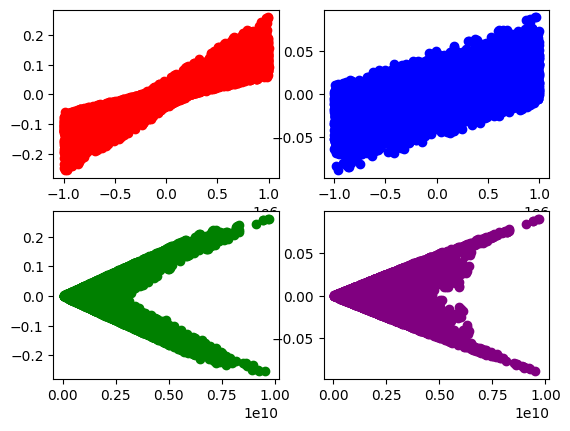

In [88]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].scatter(x['Fy'], y['desloc_y'], color='red')
axs[0, 1].scatter(x['Fx'], y['desloc_x'], color='blue')
axs[1, 0].scatter(x['Tension G0'], y['desloc_y'], color='green')
axs[1, 1].scatter(x['Tension G0'], y['desloc_x'], color='purple')


In [89]:
display_scores(forest_rmse_scores)

Scores: [0.00165539 0.00122396 0.00128968 0.00228083 0.00129837 0.00115488
 0.00129878 0.00134863 0.00217895 0.00122045]
Mean: 0.0014949905351204621
Standard deviation: 0.0003893976226327089


In [91]:
forest_rmse_scores.mean()

0.0014949905351204621

In [124]:
mediax = (data['desloc_x'].sum())/10000
mediax = mediax
print(mediax)
mediay = (data['desloc_y'].sum())/10000
mediay = mediay
print(mediay)

#Porcentagem de Erro

errox = ((forest_rmse_scores.mean())/mediax)
erroy = ((forest_rmse_scores.mean())/mediay)
print('\n')
print(f'{np.round(errox,2)}%')
print(f'{np.round(erroy,2)}%')

-3.9361178942782885e-05
-0.0001415771248497039


-37.98%
-10.56%


In [127]:
some_data = x_test.iloc[:10]
some_label = y_test.iloc[:10]
y_pred = forest.predict(some_data)

print(some_label)
print(y_pred)

      desloc_x  desloc_y
6252 -0.005052 -0.063320
4684 -0.010848 -0.089313
1731  0.006445  0.001873
4742 -0.006164 -0.009766
4521 -0.044241 -0.121271
6340  0.037268  0.081613
576   0.028529  0.114034
5202 -0.047223 -0.144769
6363  0.028539  0.109373
439  -0.027674 -0.090967
[[-0.00384437 -0.06183901]
 [-0.01044529 -0.08756065]
 [ 0.0066568   0.00199656]
 [-0.00618712 -0.00995065]
 [-0.04449794 -0.12406707]
 [ 0.03696234  0.08226013]
 [ 0.02895385  0.11358757]
 [-0.04717697 -0.14511707]
 [ 0.02835601  0.10874695]
 [-0.02752837 -0.09056882]]


In [129]:
dectree= DecisionTreeRegressor()
dectree.fit(x_train,y_train)
some_data = x_test.iloc[:5]
some_label = y_test.iloc[:5]

dectree_scores = cross_val_score(dectree, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
dectree_rmse_scores = np.sqrt(-dectree_scores)

In [131]:
display_scores(dectree_rmse_scores)

Scores: [0.0027788  0.00259796 0.00273929 0.00265963 0.00285239 0.00255071
 0.00256459 0.00260808 0.0029807  0.00269382]
Mean: 0.0027025956160564245
Standard deviation: 0.00013071084715856015


Testando Random Forest sem a variável tensão G0

In [61]:
x = data.drop(['desloc_x', 'desloc_y', 'Tension G0'], axis = 1)
y = pd.DataFrame({'desloc_x': data.desloc_x, 'desloc_y': data.desloc_y})


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
x

,Section G0,Fx,Fy
0,0.000235,134227,-969227
1,0.000471,769976,447792
2,0.000349,689986,-878056
3,0.000379,-182321,145156
4,0.000235,805925,-812501
...,...,...,...
9995,0.000379,-143470,735610
9996,0.000379,228511,-131279
9997,0.000389,508463,617533
9998,0.000379,926644,-741264


In [67]:
y

,desloc_x,desloc_y
0,-0.044982,-0.198496
1,0.027013,0.067327
2,-0.012094,-0.101198
3,0.000144,0.013206
4,-0.009906,-0.130368
...,...,...
9995,0.020134,0.092072
9996,0.001451,-0.009894
9997,0.031701,0.095048
9998,-0.000846,-0.067582


In [63]:
forest2 = RandomForestRegressor()
forest2.fit(x_train,y_train)
forest_scores2 = cross_val_score(forest2, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores2 = np.sqrt(-forest_scores2)

In [64]:
display_scores(forest_rmse_scores2)

Scores: [0.00204656 0.00208899 0.00192677 0.0021475  0.00205111 0.00200853
 0.00208879 0.0022352  0.00196061 0.002056  ]
Mean: 0.002061005086431904
Standard deviation: 8.400191071848047e-05


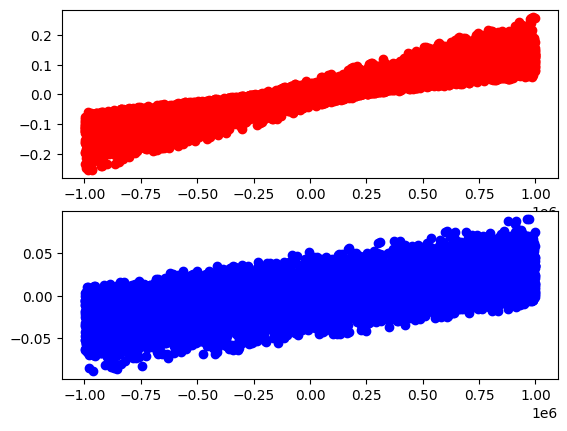

In [76]:
fig, axs = plt.subplots(2,2)

axs[0,0].scatter(x['Fy'], y['desloc_y'], color='red')
axs[1,0].scatter(x['Fx'], y['desloc_x'], color='blue')

In [ ]:
some_data = x_test.iloc[:5]
some_label = y_test.iloc[:5]
y_pred = forest2.predict(some_data)

print(some_label)
print(y_pred)

      desloc_x  desloc_y
6252 -0.005052 -0.063320
4684 -0.010848 -0.089313
1731  0.006445  0.001873
4742 -0.006164 -0.009766
4521 -0.044241 -0.121271
[[-0.00665843 -0.06269511]
 [-0.01160859 -0.09262047]
 [ 0.00660405  0.00184724]
 [-0.00577076 -0.00912289]
 [-0.0437751  -0.12062012]]
